In [2]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
import xgboost as xgb

# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario2_EDC-11K"

In [3]:
# read input file and index file for training and test set
dataset = np.load(workdir + "//200914_EDC11K.npz")
ss0 = np.load(workdir + '//200914_EDC11K_r0_9_1.npz')

In [4]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [5]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [6]:
# checking the size of dataset
x.shape

(11360, 21313)

In [7]:
# checking the size of training set
training_image_array.shape

(10224, 21313)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 21313) (10224,) (1136, 21313) (1136,)


In [10]:
# data typing and the number of dataset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 21313)
10224 train samples
1136 test samples


In [11]:
# model fitting
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
model = xgb.XGBRegressor()
model.fit(train_X,train_y)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 11:27:11.205093
[11:27:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-09-15 11:34:46.422163


In [12]:
predicted_classes = model.predict(test_X)

In [13]:
predicted_value = predicted_classes

In [14]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EDC-11K"
c.to_csv(workdir + '//200915_EDC11K_XGB_pred_and_val_result.csv', index=False)


In [15]:
# result table
c.head()

,Predicted,Test
0,1.767283,2.079442
1,-2.675633,-3.022156
2,1.353354,2.079442
3,2.104320,2.079442
4,1.781968,2.079442


In [16]:
# the length of result table
predicted_value.shape

(1136,)

In [17]:
# model save
import pickle
from sklearn.externals import joblib
joblib.dump(model, workdir + '//200915_EDC11K_XGB_model.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EDC-11K//200915_EDC11K_XGB_model.pkl']

In [18]:
# check whether the saved model is working
regr_from_joblib = joblib.load(workdir + '//200915_EDC11K_XGB_model.pkl') 
regr_from_joblib.predict(test_X)

[11:34:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 1.7672826, -2.6756327,  1.3533541, ...,  1.9186232,  1.8112341,
       -2.4499714], dtype=float32)

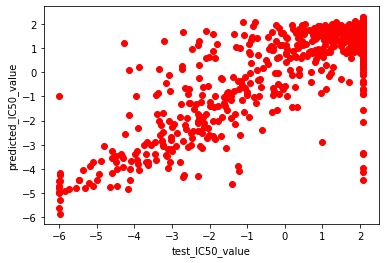

In [19]:
# plotting
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//200915_EDC11K_XGB_plot.png')

In [20]:
# R-squared value
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7506837638082188


In [21]:
# Linear regression value (slope)
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7565274181154802, intercept=0.17666801335009552, rvalue=0.8666434973873477, pvalue=0.0, stderr=0.012933481667176268)

In [22]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.0011380127332332
